<a href="https://www.kaggle.com/code/juanhdzma/survivability-predictor-ann-lr-svm-0-772?scriptVersionId=129569626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Titanic's survivability predictor**
#### By: Juan Carlos Hernandez Mariño

## Introduction

The purpose of the following project is to predict and classify whether a certain group of passengers survived the Titanic accident. To achieve this goal, various techniques from Machine Learning, Deep Learning, and Data Engineering will be utilized. Some of the techniques that will be employed include:

* Machine Learning:
  * K-Nearest Neighbors (KNN)
  * Logistic Regression (LR)
  * Support Vector Machine (SVM)
* Deep Learning:
  * Artificial Neural Networks (ANN)
* Data Engineering:
  * Data Cleaning
  * Data Transformation

In order to achieve the stated goal, we will evaluate and compare the predictions generated by each algorithm (Logistic Regression, SVM, and Neural Networks) to assess their respective performance. The classification task will involve a binary variable, where '1' indicates that the passenger survived and '0' indicates that the passenger did not survive.

To gain a better understanding of the problem, we will now proceed with a brief overview of the dataset and its values.









## Dataset and Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

dataset = pd.read_csv('/kaggle/input/titanic/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### *Metadata*
Meaning and possible values of each attribute:

**PassengerId**: Index of passangers (Positive integer)

**Survived**: State of the passanger (1, 0), '1' Meaning that the passanger survived and '0' that not.

**Pclass**: Ticket class (1, 2, 3), each one considered as first, second, or third class.

**Name**: Name of the passanger (String)

**sex**: Biological sex (male, female)

**Age**: Age in years (Positive float)

**SibSp**: # of siblings or spouses aboard the Titanic (Positive integer)
    
**Parch**: # of parents or children aboard the Titanic (Positive integer)

**Ticket**: Ticket number (String)
    
**fare**: Ticket fare (Positive float)

**cabin**: Cabin number (String)
    
**embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Based on the information provided, we have determined the data types associated with each column. The 'PassengerId' attribute, which serves as an index value, will be disregarded for further analysis. Similarly, the 'Name' attribute will not be considered due to its intricate nature and the complexity involved in its thorough analysis. Given these exclusions, we can proceed with a comprehensive description of the data, starting the number of instances in the dataset and the numerical attributes. 

In [2]:
print(f"Number of instances in the dataset: {dataset.shape[0]}")

Number of instances in the dataset: 891


In [3]:
dataset.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True, errors='ignore')

## Temporarily, we will exclude the attributes 'Survived' and 'Pclass' from our analysis as they are classified as categorical variables.

dataset.drop(columns=['Survived', 'Pclass'], axis=1).describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


From this information have some important insights:

* **Age**: The majority of passengers on the Titanic were below the age of *38*.
* **SibSp**: Most passengers did not have their spouses or siblings accompanying them on board.
* **Parch**: The vast majority of passengers did not have their parents or children with them on board.
* **Fare**: There is a significant variation in the fare paid by passengers. The mean fare is *32.20*, with the maximum fare reaching *512.32*. The fare range is considerable, spanning from *0* to *512.32*.

Having analyzed the numerical attributes, we will now proceed with the examination of the categorical variables.

In [4]:
## Temporarily, we will exclude the attributes 'Age', 'SibSp', 'Parch', and 'Fare' from our analysis as they are classified as numerical variables.

for item in dataset.drop(columns=['Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1):   
    print(f"==={item.center(10)}===")
    counts_table = dataset[item].value_counts().reset_index()
    counts_table.columns = ['Value', 'Count']
    print(counts_table, end='\n\n')

=== Survived ===
   Value  Count
0      0    549
1      1    342

===  Pclass  ===
   Value  Count
0      3    491
1      1    216
2      2    184

===   Sex    ===
    Value  Count
0    male    577
1  female    314

=== Embarked ===
  Value  Count
0     S    644
1     C    168
2     Q     77



In the previous analysis, we excluded the attributes 'Ticket' and 'Cabin' as they contain values that serve as identifiers for specific cabins or tickets, limiting exploratory analysis.

From this information have some important insights:
* **Survived**: The majority of passengers did not survive.
* **Pclass**: As the class increases, the number of passengers decreases.
* **Sex**: The majority of passengers are male.
* **Embarked**: The vast majority of passengers boarded the ship at the port of Southampton (S).

Considering the information provided, it is advisable to assess the presence of null values in the dataset to incorporate them into the data cleaning process. This step is crucial for handling missing data effectively during data preprocessing.

In [5]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Based on the obtained results, it is necessary to take into account the attributes 'Age', 'Cabin', and 'Embarked' due to the presence of null values in certain instances.

After conducting some exploration of the dataset, it is crucial to visually examine if any patterns can be identified between each column and the target variable 'Survived'. This analysis will help uncover potential relationships and insights that can contribute to the prediction and classification of survival outcomes.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


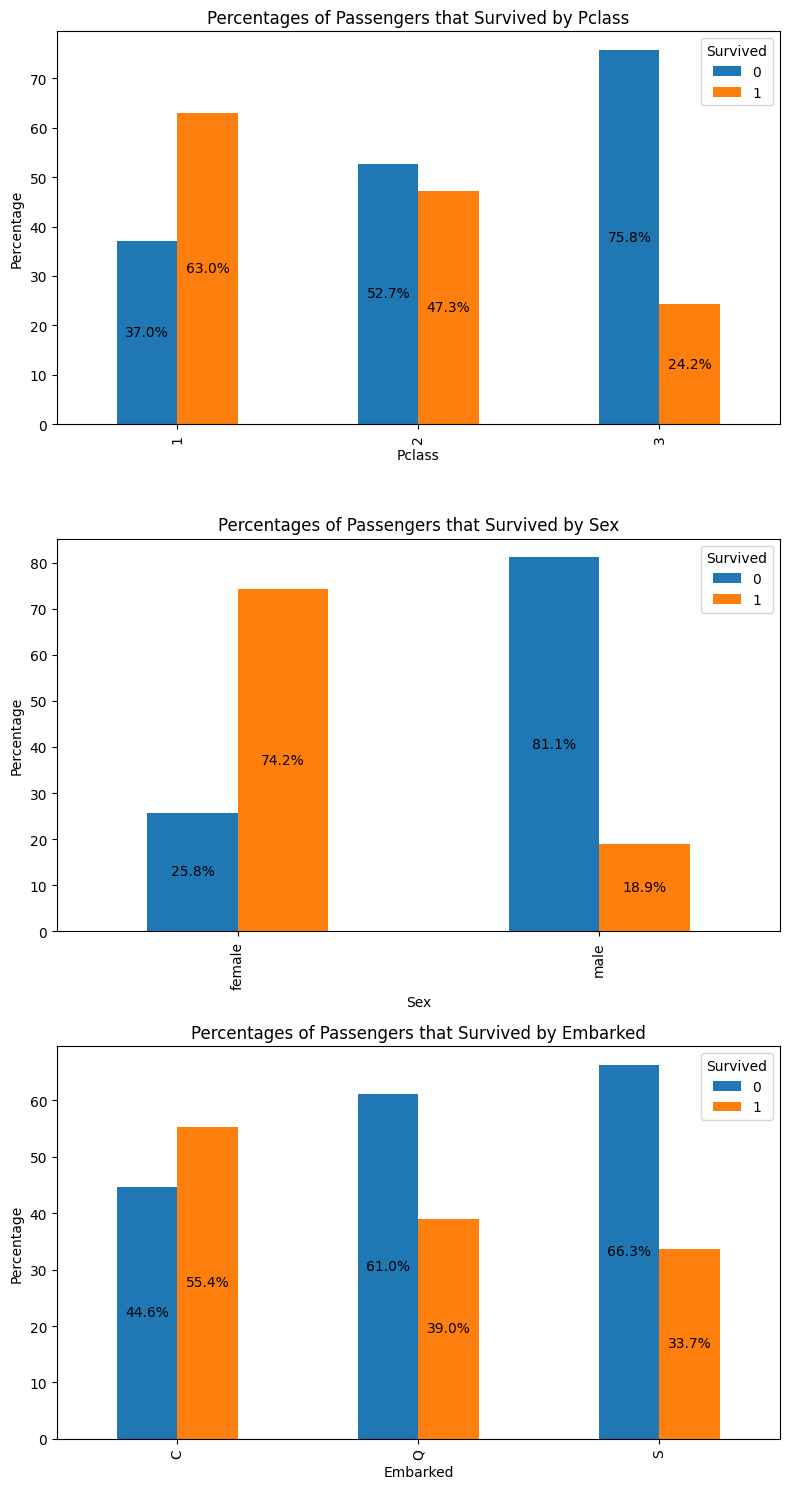

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_attributes = ['Pclass', 'Sex', 'Embarked']
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(8, len(categorical_attributes)*5))

for i, attribute in enumerate(categorical_attributes):
    ax = axes[i]
    grouped_data = dataset.groupby([attribute, 'Survived']).size().unstack()
    percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
    percentage_data.plot(kind='bar', stacked=False, ax=ax)
    ax.set_xlabel(attribute)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentages of Passengers that Survived by {attribute}')
    ax.legend(title='Survived')
    
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.1f%%', padding=0.4)

plt.tight_layout()
plt.show()

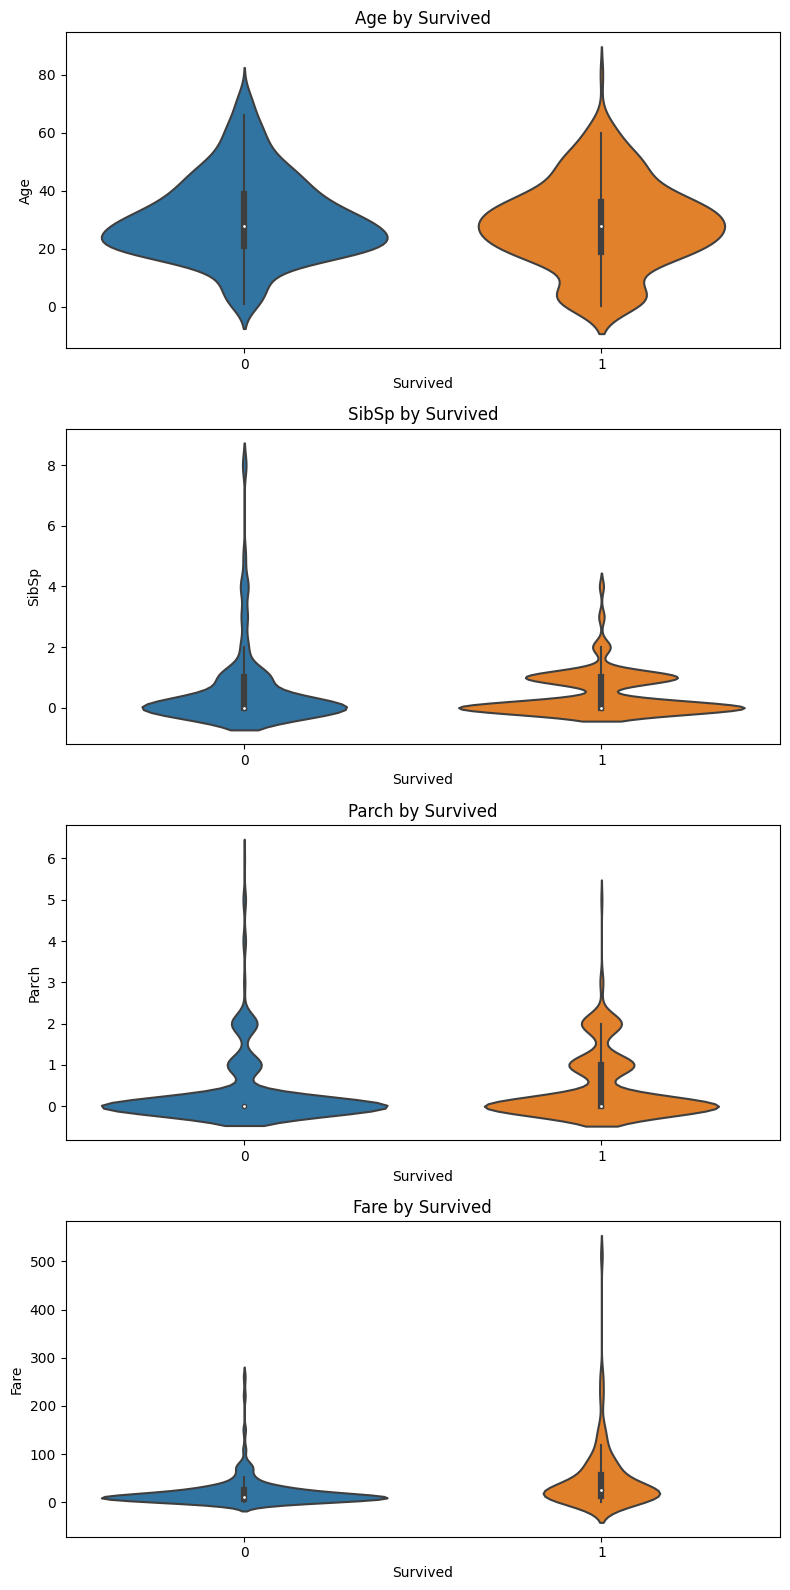

In [7]:
numeric_attributes = ['Age', 'SibSp', 'Parch', 'Fare']
fig, axes = plt.subplots(nrows=len(numeric_attributes), figsize=(8, len(numeric_attributes)*4))

for i, attribute in enumerate(numeric_attributes):
    ax = axes[i]
    sns.violinplot(data=dataset, x='Survived', y=attribute, ax=ax)
    ax.set_xlabel('Survived')
    ax.set_ylabel(attribute)
    ax.set_title(f'{attribute} by Survived')

plt.tight_layout()
plt.show()

There is a clear relationship between the 'Pclass' attribute and the survival rate, it can be observed that a higher percentage of people survived in the first class compared to the third class. This trend is also evident in the 'Fare' attribute, where passengers who paid higher fares have a greater likelihood of survival.

Furthermore, it is evident in the 'Sex' attribute that the majority of females survived compared to males.

On the other hand, there is a higher survival rate for passengers who embarked at port C.

While there are other visible relationships in the analysis, the most relevant ones are the ones mentioned above.

Other possible action to evaluate is the correlation between the variables, we can analyze the correlation matrix of the dataset that expresses the linear relationship between each pair of variables and provides insights into their interdependencies. By identifying variables with high correlation, we can potentially reduce dimensionality without losing significant information.

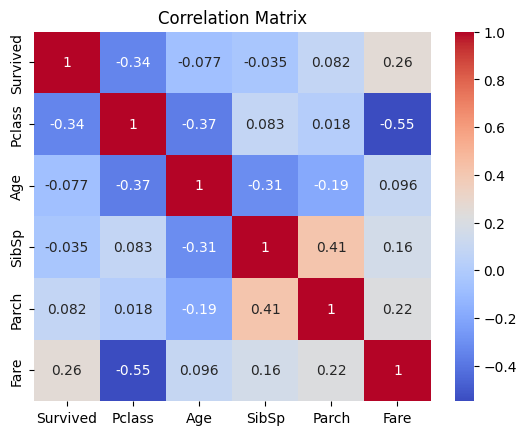

In [8]:
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the dataset's correlation matrix analysis, it appears that the only notable relationship is the negative correlation between 'Pclass' and 'Fare'. However, the correlation between these variables is not strong enough to warrant consideration for dimensionality reduction. Therefore, it seems that there are no significant correlations among the variables that would justify reducing the dimensionality of the dataset based on correlation alone.

## Data Preprocessing

For data preprocessing, we will focus on two main steps: data cleaning and transformation.
* **Data Cleaning**:
    * ***Handling Missing Values***: We know that there are some missing values in the attributes 'Age', 'Cabin' and 'Embarked'. 
        * For the 'Age' attribute, which has a significant number of missing values, we will employ the K Nearest Neighbors (KNN) algorithm. We will identify the five nearest neighbors for each missing value and assign the missing value as the mean of the 'Age' values of its nearest neighbors.
        * Regarding the 'Cabin' attribute, we will simplify the approach by converting it into a binary variable. We will assign '1' to instances with a valid 'Cabin' value and '0' to instances with missing cabin values.
        * As for the 'Embarked' attribute, since there are only two instances with missing values, we will simply remove those instances from the dataset.
    * ***Dropping unused attributes***: We will drop certain attributes from the dataset as they either serve as index values or are too complex to conduct further analysis. The attributes 'PassengerId', 'Name', and 'Ticket' will be removed from the dataset.
    
    
* **Data Transformation**:
    * ***Feature Scaling***: To ensure uniform scaling of the numerical attributes, we will use the StandardScaler transformation. This technique will be applied to the 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare' attributes. StandardScaler will perform z-score scaling, resulting in each attribute having a mean of 0 and a standard deviation of 1. This approach prevents any single attribute from dominating the analysis due to a larger scale.
    * ***Encoding Categorical Variables***: Categorical variables need to be encoded into numerical form to be used in machine learning algorithms.
        * For the 'Sex' and 'Cabin' attributes, which have binary values, we will assign '1' and '0' for their categories.
        * For the 'Embarked' attribute, which has three possible values (C, Q, S), we will use one-hot encoding. This means creating three separate binary variables, where each variable represents one possible value. For an instance, if it is associated with the 'C' category, the 'C' variable will be set to '1', and the other variables ('Q' and 'S') will be set to '0'.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

trainData = pd.read_csv('/kaggle/input/titanic/train.csv')
testData = pd.read_csv('/kaggle/input/titanic/test.csv')

def getPredictorData(db):
    ## Deep copy of the dataset
    dataset = db.copy()
    ## Drop unused columns
    dataset.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True, errors='ignore') 
    
    ## Categorical Values
    ## Categorize the 'Cabin' attribute
    dataset['Cabin'] = dataset['Cabin'].notnull().astype(int)
    ## Categorize the 'Sex' attibute
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
    ## Delete the null 'Embarked' values, then do the one-hot encoding and annex it to the dataset
    dataset.dropna(subset=['Embarked'], inplace=True)
    one_hot_encoded = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
    dataset = pd.concat([dataset, one_hot_encoded], axis=1)
    dataset.drop('Embarked', axis=1, inplace=True)

    ## Numerical Values
    ## 'Age' Posterior imputation
    imputer = KNNImputer(n_neighbors=5)
    dataset['Age'] = imputer.fit_transform(dataset[['Age']])
    dataset['Age'] = dataset['Age'].astype(int)
    ## MinMax Scaler in 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare' attributes
    columns_to_normalize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    subset = dataset[columns_to_normalize]
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(subset)
    normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)
    dataset[columns_to_normalize] = normalized_df
    
    ## Droping any left value
    dataset.dropna(how='any', inplace=True)
    
    ## Copy the target from 'Survived' attribute
    target = dataset['Survived'].copy()
    ## Delete the attribute 'Survived' from the dataset
    dataset.drop(columns=['Survived'], axis=1, inplace=True, errors='ignore') 
    return dataset, target

## ML and DL modeling

We will compare the results of three different machine and deep learning algorithms: Logistic Regression, Support Vector Machine (SVM), and Artificial Neural Networks (ANN). These algorithms will be trained and evaluated on the given dataset to predict the target variable, 'Survived'.

To compare the performance of the Logistic Regression, Support Vector Machine (SVM), and Artificial Neural Networks (ANN) models, we will randomly divide the training dataset into training and testing sets. Each model will be trained and evaluated 3 times on different random divisions. We will calculate the average performance across the repetitions to determine which model performs better overall.

#### **Artificial Neural Network (ANN)**

In [40]:
from typing import List
from keras.models import Sequential
from keras.layers import Dense

## Function to generate a model given the number of neurons per layer.
## Also, with the number of items in the list we can deduce the number of hidden layers
def regression_model(neurons: List[int], numCols: int):
    model = Sequential()
    ## We iterate over each layer we want to create and create it
    for index, numNeurons in enumerate(neurons):
      ## If the layer is the first one, we define the number of input neurons
      if index == 0:
        model.add(Dense(numNeurons, activation='tanh', input_shape=(numCols,)))
      else:
        model.add(Dense(numNeurons, activation='tanh'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

## Define a function to train a model
def ANNTraining(neurons: List[int], numCols: int, predictors, target, epochs):
    ## We create a NN with 'len(neurons)'' hidden layers and the 'neurons' list provides the number of neurons in each layer
    ann = regression_model(neurons, numCols)
    ## Fit the model with de train data, and verbose = 0 to avoid displaying the default prints
    ann.fit(predictors, target, epochs=epochs, verbose=0)
    return ann


#### **Logistic Regression (LR)**

In [11]:
from sklearn.linear_model import LogisticRegression

def LRTraining(predictors, target):
    ## Create Logistic Regression model with liblinear solver
    lr = LogisticRegression(solver='liblinear')
    lr.fit(predictors, target)
    return lr

#### **Support Vector Machine (SVM)**

In [12]:
from sklearn import svm

def SVMTraining(predictors, target):
    ## Create SVM model with 'rbf' kernel
    clf = svm.SVC(kernel='rbf')
    clf.fit(predictors, target) 
    return clf

#### **Comparison**

To compare the models, we will split the training dataset into 80% for training and 20% for testing. Each model will be tested 3 times on the 20% test set, and the average metric scores will be calculated. We will evaluate metrics such as accuracy, F1-Score, and Jaccard Index to assess the performance of each model.

Additionally, we will measure the running time of each algorithm in seconds. This running time corresponds to the time required for the algorithm to complete the 3 iterations mentioned earlier. By considering the model's performance metrics and running time, we can select the model with the lowest error and aim for a higher score with the test dataset.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def executeModel(model, predictors, target, iterations):
    accuracy, f1, jaccard = 0, 0 ,0
    for index in range(iterations):
        ## Divide the dataset
        X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
        
        ## Artificial Neural Networks
        if model == 'ANN':
            annModel = ANNTraining([5, 10, 10, 10, 5], len(predictors.columns), X_train, y_train, 200)
            ## Predict the values for X_test 
            predictions = annModel.predict(X_test, verbose=0)
            predictions = [1 if value > 0.4 else 0 for value in predictions]  
            ## Aggregate metrics
            accuracy += accuracy_score(y_test, predictions)
            f1 += f1_score(y_test, predictions)
            jaccard += jaccard_score(y_test, predictions)
            
        ## Logistic Regression
        elif model == 'LR':
            lrModel = LRTraining(X_train, y_train)
            ## Predict the values for X_test 
            predictions = lrModel.predict(X_test)
            ## Aggregate metrics
            accuracy += accuracy_score(y_test, predictions)
            f1 += f1_score(y_test, predictions)
            jaccard += jaccard_score(y_test, predictions)
                
        ## Support Vector Machine
        elif model == 'SVM':
            svmModel = SVMTraining(X_train, y_train)
            ## Predict the values for X_test 
            predictions = svmModel.predict(X_test)
            ## Aggregate metrics
            accuracy += accuracy_score(y_test, predictions)
            f1 += f1_score(y_test, predictions)
            jaccard += jaccard_score(y_test, predictions)
            
    return [model, (accuracy/iterations), (f1/iterations), (jaccard/iterations)]

In [85]:
import time

models = ['ANN', 'LR', 'SVM']
data = []

for index, value in enumerate(models):
    start_time = time.time()
    predictors, target = getPredictorData(trainData)
    result = executeModel(value, predictors, target, 3)
    end_time = time.time()
    formatted_runtime = "{:.3f}".format(end_time - start_time)
    result = result + [formatted_runtime]
    data.append(result)
    
    
comparison = pd.DataFrame(data, columns=['Model', 'Accuracy', 'F1', 'Jaccard', 'Runtime'])
print(comparison)

  Model  Accuracy        F1   Jaccard Runtime
0   ANN  0.775281  0.733091  0.578853  32.976
1    LR  0.754682  0.677566  0.513396   0.059
2   SVM  0.739700  0.661876  0.495066   0.118


Based on the results, it is evident that the Artificial Neural Networks (ANN) algorithm has a significantly longer running time compared to the other two algorithms. However, the ANN demonstrates superior performance with higher scores in metrics such as accuracy, F1-score, and Jaccard Index.

To achieve better results, it may be necessary to allocate more time for the ANN algorithm. Alternatively, it is worth considering whether a slightly lower score with a substantial improvement in time would be acceptable.

The next best performing algorithm is Logistic Regression, which exhibits a similar level of performance to the ANN algorithm while requiring less computation time.

Ultimately, the choice between the ANN and Logistic Regression algorithms depends on the specific requirements of the problem, considering the trade-off between performance and computational resources.

## Submition (CSV File) Generation

In order to submit our predictions to the competition, we need to perform the same data engineering process on the Test Dataset as we did with the Train Dataset. This includes steps such as data cleaning, handling missing values, dropping unused attributes, feature scaling, and encoding categorical variables.

Since the explanation of these steps has already been provided in the earlier discussions, I will omit the detailed explanation here. However, please note that you can refer back to the previous discussions for a comprehensive understanding of each step and how they were applied to the Train Dataset.

In [67]:
## Data treatment to the Test dataset

dataset = testData.copy()
dataset.drop(columns=['Name', 'Ticket'], axis=1, inplace=True, errors='ignore') 
dataset['Cabin'] = dataset['Cabin'].notnull().astype(int)
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
one_hot_encoded = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
dataset = pd.concat([dataset, one_hot_encoded], axis=1)
dataset.drop('Embarked', axis=1, inplace=True)
imputer = KNNImputer(n_neighbors=5)
dataset['Age'] = imputer.fit_transform(dataset[['Age']])
dataset['Age'] = dataset['Age'].astype(int)
imputer = KNNImputer(n_neighbors=5)
dataset['Fare'] = imputer.fit_transform(dataset[['Fare']])
dataset['Fare'] = dataset['Fare'].astype(int)
columns_to_normalize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
subset = dataset[columns_to_normalize]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(subset)
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)
dataset[columns_to_normalize] = normalized_df
ids = dataset['PassengerId'].copy()
dataset.drop('PassengerId', axis=1, inplace=True)

After completing the data engineering process on the Test Dataset, we can proceed with the training of each model using the Training Dataset. The following code contains the three options for the algorithms, but only one of them should be uncommented at a time for testing purposes. The uncommented algorithm will generate the expected CSV file for submission.

Please ensure that only the chosen algorithm is uncommented in the code before running it. This way, the selected algorithm will generate the predictions in the desired format for the competition submission.

In [83]:
## Training dataset
predictors, target = getPredictorData(trainData)

##  ==== ANN Model ====
# annModel = ANNTraining([5, 10, 10, 10, 5], len(predictors.columns), predictors, target, 200)
# predictions = annModel.predict(dataset, verbose=0)
# predictions = [1 if value > 0.4 else 0 for value in predictions]

## ==== LR Model ====
lrModel = LRTraining(predictors, target)
predictions = lrModel.predict(dataset)

## ==== SVM Model ====
# svmModel = SVMTraining(predictors, target)
# predictions = svmModel.predict(dataset)

## Fusion the IDs with predictions, and then, generate a csv with that information
result = list(zip(ids, predictions))
result = pd.DataFrame(result, columns=['PassengerId', 'Survived'])
result.to_csv('submission.csv', index=False)

After the results in the submition, the best model was the Logistic Regression, considering that earlier we have said that the best model appears to be the ANN, we could conclude that the model was overfitting in the Training Dataset, thus, derivating in a lower performance in a dataset unknown to the model. Even with that finding, the results of the classification was pretty satisfactory, with a maximum score of ***0.77272***.